In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
data = pd.read_csv('melb_data1.csv')

In [3]:
data

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000,2.5,3067,2,1,1.0,202,NaN,NaN,-37.79960,144.99840,4019
1,2,1035000,2.5,3067,2,1,0.0,156,79.0,1900.0,-37.80790,144.99340,4019
2,3,1465000,2.5,3067,3,2,0.0,134,150.0,1900.0,-37.80930,144.99440,4019
3,3,850000,2.5,3067,3,2,1.0,94,NaN,NaN,-37.79690,144.99690,4019
4,4,1600000,2.5,3067,3,1,2.0,120,142.0,2014.0,-37.80720,144.99410,4019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000,16.7,3150,4,2,2.0,652,NaN,1981.0,-37.90562,145.16761,7392
13576,3,1031000,6.8,3016,3,2,2.0,333,133.0,1995.0,-37.85927,144.87904,6380
13577,3,1170000,6.8,3016,3,2,4.0,436,NaN,1997.0,-37.85274,144.88738,6380
13578,4,2500000,6.8,3016,4,1,5.0,866,157.0,1920.0,-37.85908,144.89299,6380


In [4]:
data.dropna(inplace=True)


In [5]:
data.isnull().sum()

Rooms            0
Price            0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [6]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6830.000000,6.830000e+03,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000
mean,2.978184,1.077604e+06,10.148960,3104.262225,2.951391,1.594143,1.606881,487.495461,143.446606,1964.444070,-37.808012,144.991877,7433.780527
std,0.970479,6.733202e+05,5.991423,91.208614,0.970789,0.714366,0.944613,910.805627,89.970692,37.706332,0.080042,0.104983,4352.096045
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.300000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,167.000000,93.000000,1940.000000,-37.856797,144.925522,4381.250000
50%,3.000000,8.900000e+05,9.200000,3083.000000,3.000000,1.000000,2.000000,404.000000,126.000000,1970.000000,-37.802190,144.997000,6567.000000
75%,4.000000,1.334000e+06,13.000000,3147.000000,4.000000,2.000000,2.000000,641.000000,173.000000,2000.000000,-37.756900,145.056100,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6830 entries, 1 to 13579
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6830 non-null   int64  
 1   Price          6830 non-null   int64  
 2   Distance       6830 non-null   float64
 3   Postcode       6830 non-null   int64  
 4   Bedroom2       6830 non-null   int64  
 5   Bathroom       6830 non-null   int64  
 6   Car            6830 non-null   float64
 7   Landsize       6830 non-null   int64  
 8   BuildingArea   6830 non-null   float64
 9   YearBuilt      6830 non-null   float64
 10  Lattitude      6830 non-null   float64
 11  Longtitude     6830 non-null   float64
 12  Propertycount  6830 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 747.0 KB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['Price'], axis=1)
y = data['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}, MSE: {mse}, R^2: {r2}')


MAE: 269659.55635186646, MSE: 182632989303.22006, R^2: 0.566824862634469


In [40]:
import numpy as np

# Example: New data point (replace with actual feature values)
new_data = np.array([[3, 1500000, 2.5, 3067, 2, 1, 1, 43, 2002, -37.7998, 144.9987, 4019]])

# Ensure the input is in the correct 2D shape
# Make a prediction using the trained model
predicted_price = model.predict(new_data)
print(f'Predicted house price: {predicted_price[0]}')


Predicted house price: -61956833141.41893


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


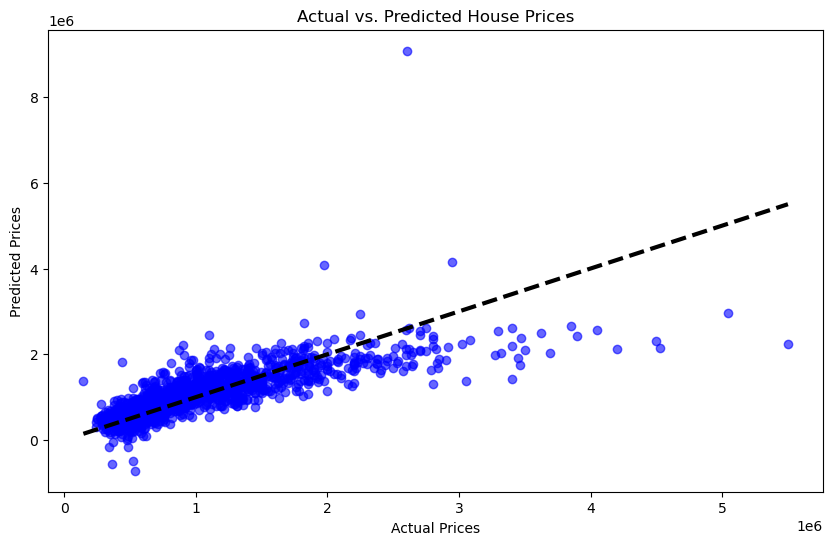

In [48]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.show()


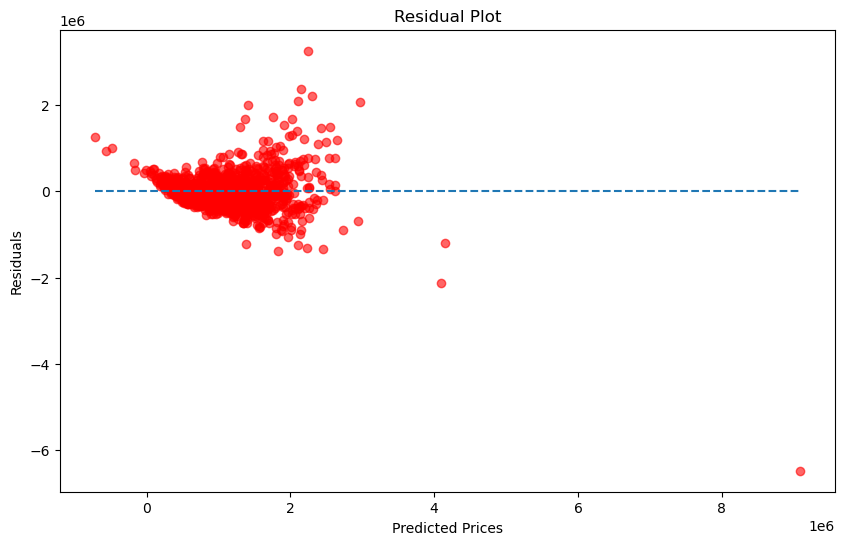

In [50]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='r')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), linestyles='dashed')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [52]:
import joblib

# Save the model to a file
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']